In [1]:
%matplotlib notebook

In [2]:
from operator import itemgetter
import matplotlib.pyplot as plt
from collections import defaultdict
!pip install mplcursors
import mplcursors

In [3]:
syms = open('lto-on-earl-objects.txt', 'r')
lines = syms.readlines()

byte_ct = 0
d = {}
for line in lines:
    spl = line.split()
    hexed = int(spl[4], 16)
    byte_ct += hexed
    d[spl[0]] = (spl[5], int(hexed))

print(byte_ct)

for k, v in d.items():
    print(k + ' : ' + str(v))

15106
20012402 : ('.L__unnamed_136', 21)
200126e0 : ('.L__unnamed_139', 192)
200128d4 : ('.L__unnamed_140', 214)
20012854 : ('.L__unnamed_142', 128)
200129ec : ('.L__unnamed_144', 64)
200129aa : ('.L__unnamed_145', 63)
20012a2c : ('.L__unnamed_146', 198)
20012b9c : ('.L__unnamed_148', 128)
20012ecc : ('.L__unnamed_150', 224)
2001309c : ('.L__unnamed_156', 96)
20011c98 : ('.L__unnamed_170', 26)
20011cf9 : ('.L__unnamed_171', 21)
20011f88 : ('.L__unnamed_174', 3)
20011f8b : ('.L__unnamed_176', 6)
20011f91 : ('.L__unnamed_177', 3)
20011f94 : ('.L__unnamed_178', 3)
200120e8 : ('.L__unnamed_179', 31)
20012122 : ('.L__unnamed_181', 24)
20012293 : ('.L__unnamed_182', 20)
200122a7 : ('.L__unnamed_183', 3)
200122aa : ('.L__unnamed_184', 11)
200122b5 : ('.L__unnamed_185', 22)
200122cb : ('.L__unnamed_186', 20)
200122df : ('.L__unnamed_187', 19)
200122f2 : ('.L__unnamed_188', 34)
20012314 : ('.L__unnamed_189', 5)
20012319 : ('.L__unnamed_190', 15)
20012328 : ('.L__unnamed_191', 20)
2001233c : ('.

2001433e : ('.Lanon.fe81a167ddb6df6f428dffd8ed95d397.228', 10)
2001406f : ('.Lanon.fe81a167ddb6df6f428dffd8ed95d397.23', 27)
20014320 : ('.Lanon.fe81a167ddb6df6f428dffd8ed95d397.231', 10)
2001432a : ('.Lanon.fe81a167ddb6df6f428dffd8ed95d397.233', 7)
2001430c : ('.Lanon.fe81a167ddb6df6f428dffd8ed95d397.234', 7)
2001438f : ('.Lanon.fe81a167ddb6df6f428dffd8ed95d397.272', 10)
20014388 : ('.Lanon.fe81a167ddb6df6f428dffd8ed95d397.273', 7)
2001437a : ('.Lanon.fe81a167ddb6df6f428dffd8ed95d397.274', 14)
2001436c : ('.Lanon.fe81a167ddb6df6f428dffd8ed95d397.275', 14)
20014365 : ('.Lanon.fe81a167ddb6df6f428dffd8ed95d397.276', 7)
2001435e : ('.Lanon.fe81a167ddb6df6f428dffd8ed95d397.277', 7)
2001416e : ('.Lanon.fe81a167ddb6df6f428dffd8ed95d397.40', 20)
20014184 : ('.Lanon.fe81a167ddb6df6f428dffd8ed95d397.47', 10)
2001418e : ('.Lanon.fe81a167ddb6df6f428dffd8ed95d397.48', 10)
20014198 : ('.Lanon.fe81a167ddb6df6f428dffd8ed95d397.49', 30)
200141b6 : ('.Lanon.fe81a167ddb6df6f428dffd8ed95d397.51', 51)
200

In [4]:
# dictionary of symbol to instruction addresses that they're in...
risc = open('earl_dump_lto-on.txt', 'r')
lines = risc.readlines()
sym_addrs = list(d.keys())
address_d = defaultdict(list)
# could make this faster ofc
for sym in sym_addrs:
    for line in lines:
        spl = line.split()
        if sym in line and sym != spl[0]:
            address_d[sym].append(spl[0][:-1])

for k, v in address_d.items():
    # every value list has at least 1 value (the key itself)
    print(k + ' : ' + str(v))

20012402 : ['20007e54', '20012402']
200126e0 : ['20007f08', '200126e0']
200128d4 : ['20007f4a', '200128d4']
20012854 : ['20007fac', '20012854']
200129ec : ['20007fec', '200129ec']
200129aa : ['2000800a', '200129aa']
20012a2c : ['20008048', '20012a2c']
20012b9c : ['200080a6', '20012b9c']
20012ecc : ['20008110', '20012ecc']
2001309c : ['200084b4', '2001309c']
20011c98 : ['20011c98']
20011cf9 : ['20011cf9']
20011f88 : ['20011f88']
20011f8b : ['20011f8b']
20011f91 : ['20011f91']
20011f94 : ['20011f94']
200120e8 : ['200120e8']
20012122 : ['20012122']
20012293 : ['20012293']
200122a7 : ['200122a7']
200122aa : ['200122aa']
200122b5 : ['200122b5']
200122cb : ['200122cb']
200122df : ['200122df']
200122f2 : ['200122f2']
20012314 : ['20012314']
20012319 : ['20012319']
20012328 : ['20012328']
2001233c : ['2001233c']
2001234f : ['2001234f']
2001236b : ['2001236b']
20012377 : ['20012377']
20012395 : ['20012395']
200123a3 : ['200123a3']
200123b6 : ['200123b6']
200123c8 : ['200123c8']
200123e1 : ['200

In [5]:
# translate this address dictionary's values to parent functions


def trace_instruction_to_function(instruction_addr):
    # there are more sophisticated ways to do this, yes.
    most_recent_function = None
    for line in lines:
        if instruction_addr in line:
            return most_recent_function
        if '>:' in line:
            most_recent_function = line[9:-2]


addr_func_d = defaultdict(list)
for k, v in address_d.items():
    # every value list has at least 1 value (the key itself)
    for value in v:
        if value != k:
            addr_func_d[k].append(trace_instruction_to_function(value))

# There's better ways to sort than this:
temp_d = {}
for k in sorted(addr_func_d.keys()):
    temp_d[k] = addr_func_d[k]
addr_func_d = temp_d

for k, v in addr_func_d.items():
    # every value list has at least 1 value (the key itself)
    print(k + ' : ' + str(v))

20011cc0 : ['<_ZN106_$LT$kernel..common..ring_buffer..RingBuffer$LT$T$GT$$u20$as$u20$kernel..common..queue..Queue$LT$T$GT$$GT$7enqueue17h99f238be171a2b6bE>', '<_ZN5tickv5tickv18TicKV$LT$C$C$_$GT$10get_region17hf29691246e5e5aabE>']
20011f98 : ['<_ZN64_$LT$rv32i..epmp..PMP$LT$_$GT$$u20$as$u20$core..fmt..Display$GT$3fmt17h7b5a6591ca7d9eaeE>']
20012107 : ['<_ZN6kernel5debug11panic_print17h018f93f4adf13a8eE>']
2001213a : ['<_ZN6kernel5debug11panic_print17h018f93f4adf13a8eE>']
200121a5 : ['<_ZN6kernel5debug11panic_print17h018f93f4adf13a8eE>']
200121f3 : ['<_ZN6kernel5debug11panic_print17h018f93f4adf13a8eE>']
2001223f : ['<.LBB80_403>']
20012265 : ['<_ZN6kernel5sched6Kernel10do_process28_$u7b$$u7b$closure$u7d$$u7d$17h4025199cbbc991dfE>']
20012402 : ['<_ZN95_$LT$kernel..process_standard..ProcessStandard$LT$C$GT$$u20$as$u20$kernel..process..Process$GT$16print_memory_map17h9e2b813d50dd5155E>']
200125b7 : ['<.LBB12_9>', '<_ZN66_$LT$core..option..Option$LT$T$GT$$u20$as$u20$core..fmt..Debug$GT$3fmt

In [6]:
# count all the function names in these value lists

counter = defaultdict(int)
for k, v in addr_func_d.items():
    for value in v:
        counter[value] += 1

for k, v in counter.items():
    print(k + ' : ' + str(v))

<_ZN106_$LT$kernel..common..ring_buffer..RingBuffer$LT$T$GT$$u20$as$u20$kernel..common..queue..Queue$LT$T$GT$$GT$7enqueue17h99f238be171a2b6bE> : 1
<_ZN5tickv5tickv18TicKV$LT$C$C$_$GT$10get_region17hf29691246e5e5aabE> : 1
<_ZN64_$LT$rv32i..epmp..PMP$LT$_$GT$$u20$as$u20$core..fmt..Display$GT$3fmt17h7b5a6591ca7d9eaeE> : 11
<_ZN6kernel5debug11panic_print17h018f93f4adf13a8eE> : 10
<.LBB80_403> : 1
<_ZN6kernel5sched6Kernel10do_process28_$u7b$$u7b$closure$u7d$$u7d$17h4025199cbbc991dfE> : 1
<_ZN95_$LT$kernel..process_standard..ProcessStandard$LT$C$GT$$u20$as$u20$kernel..process..Process$GT$16print_memory_map17h9e2b813d50dd5155E> : 15
<.LBB12_9> : 3
<_ZN66_$LT$core..option..Option$LT$T$GT$$u20$as$u20$core..fmt..Debug$GT$3fmt17h25ea86d8cb8379e8E> : 5
<_ZN43_$LT$bool$u20$as$u20$core..fmt..Display$GT$3fmt17h0a34636f3d8f933fE> : 2
<_ZN8earlgrey4chip16handle_interrupt17hac7a89ec414c1881E> : 1
<_ZN6kernel7process108_$LT$impl$u20$core..convert..From$LT$kernel..process..Error$GT$$u20$for$u20$kernel..er

In [7]:
# find all unreferenced strings
unreferenced = []
unref_sum = 0

for k, v in address_d.items():
    # every value list has at least 1 value (the key itself)
    if len(v) == 1:
        unreferenced.append(k)
        unref_sum += d[k][1]
        
for item in unreferenced:
    print(d[item])

('.L__unnamed_170', 26)
('.L__unnamed_171', 21)
('.L__unnamed_174', 3)
('.L__unnamed_176', 6)
('.L__unnamed_177', 3)
('.L__unnamed_178', 3)
('.L__unnamed_179', 31)
('.L__unnamed_181', 24)
('.L__unnamed_182', 20)
('.L__unnamed_183', 3)
('.L__unnamed_184', 11)
('.L__unnamed_185', 22)
('.L__unnamed_186', 20)
('.L__unnamed_187', 19)
('.L__unnamed_188', 34)
('.L__unnamed_189', 5)
('.L__unnamed_190', 15)
('.L__unnamed_191', 20)
('.L__unnamed_192', 19)
('.L__unnamed_193', 28)
('.L__unnamed_195', 12)
('.L__unnamed_196', 30)
('.L__unnamed_197', 14)
('.L__unnamed_199', 19)
('.L__unnamed_200', 18)
('.L__unnamed_201', 25)
('.L__unnamed_202', 18)
('.L__unnamed_203', 15)
('.L__unnamed_204', 244)
('.L__unnamed_205', 169)
('.L__unnamed_206', 3)
('.L__unnamed_209', 133)
('.L__unnamed_210', 34)
('.L__unnamed_211', 10)
('.L__unnamed_212', 135)
('.L__unnamed_215', 169)
('.L__unnamed_216', 157)
('.L__unnamed_217', 167)
('.L__unnamed_218', 29)
('.L__unnamed_219', 167)
('.L__unnamed_220', 29)
('.L__unnamed_2

In [8]:
print(unref_sum)

5342


This is clunky in notebooks, but hovering will give the x/y of the bar. Use zooming to make this more responsive.

<IPython.core.display.Javascript object>


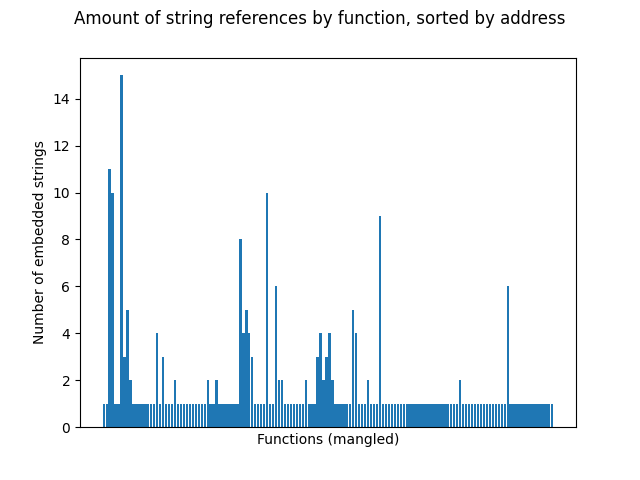

In [9]:
fig, ax = plt.subplots()
ax.bar(list(counter.keys()), list(counter.values()))
fig.suptitle('Amount of string references by function, sorted by address')
ax.set_xlabel('Functions (mangled)')
ax.set_ylabel('Number of embedded strings')
ax.set_xticks(ticks=[])
mplcursors.cursor(hover=True)
fig;

<IPython.core.display.Javascript object>


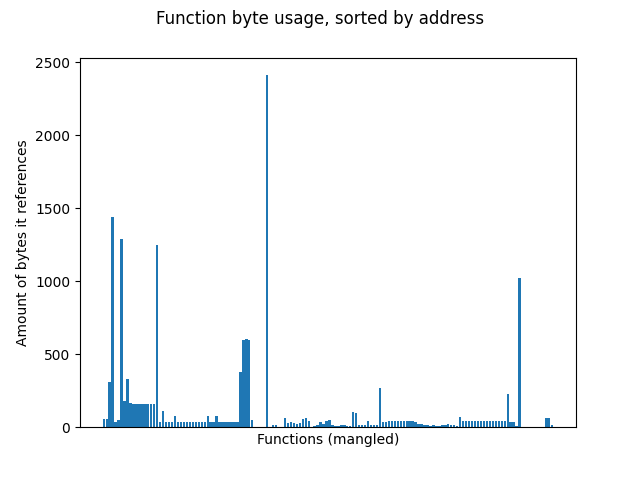

In [10]:
# bytes as y-axis instead.
byte_counter = defaultdict(int)
for k, v in addr_func_d.items():
    bites = d[k][1]
    for value in v:
        byte_counter[value] += bites
temp_d = {}
for k in counter:
    temp_d[k] = byte_counter[k]
byte_counter = temp_d

fig, ax = plt.subplots()

ax.bar(list(byte_counter.keys()), list(byte_counter.values()))
fig.suptitle('Function byte usage, sorted by address')
ax.set_xlabel('Functions (mangled)')
ax.set_ylabel('Amount of bytes it references')
ax.set_xticks(ticks=[])
mplcursors.cursor(hover=True)

fig;

<IPython.core.display.Javascript object>


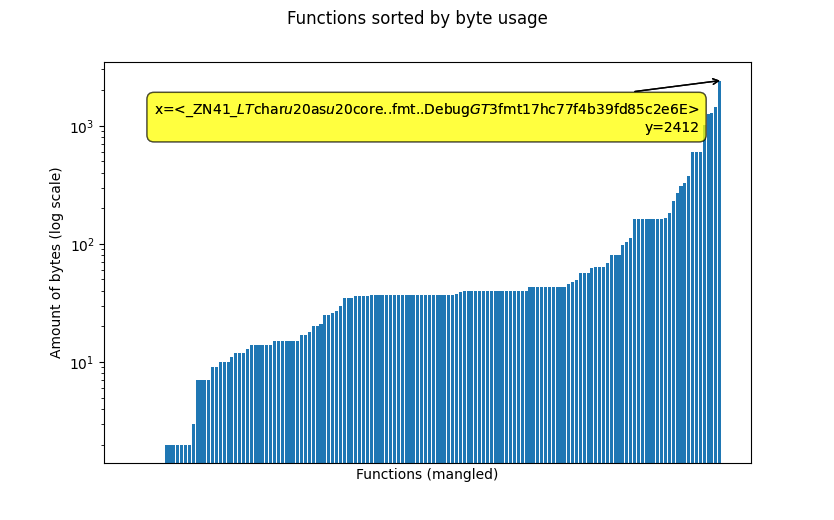

In [11]:
# sort this one by increasing
sorted_byte_counter = {k: v for k, v in sorted(
    byte_counter.items(), key=itemgetter(1))}
fig, ax = plt.subplots()

ax.set_yscale('log')
ax.bar(list(sorted_byte_counter.keys()), list(sorted_byte_counter.values()))

fig.suptitle('Functions sorted by byte usage')
ax.set_xlabel('Functions (mangled)')
ax.set_ylabel('Amount of bytes (log scale)')
ax.set_xticks(ticks=[])
mplcursors.cursor(hover=True)
fig;

<IPython.core.display.Javascript object>


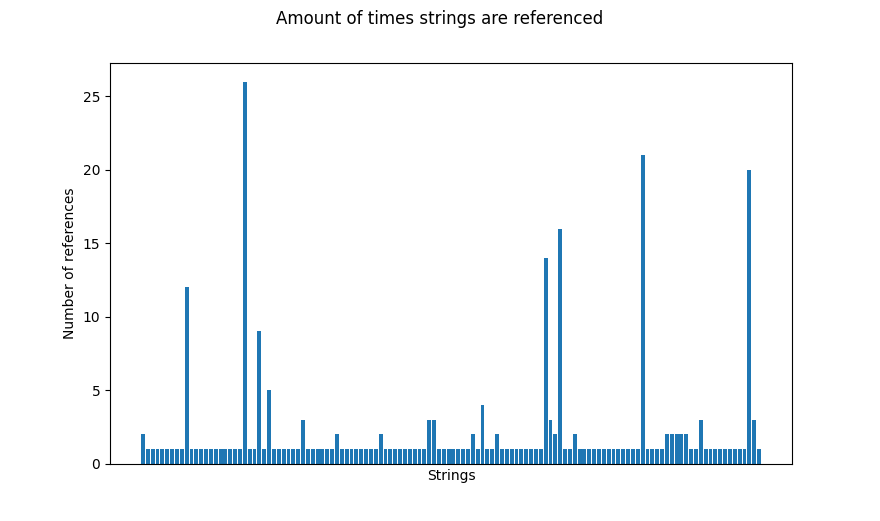

In [12]:
# x-axis being strings (could dereference these strings)
# y-axis being amount of times referenced
sym_magnitudes = {}
for k, v in addr_func_d.items():
    sym_magnitudes[k] = len(v)

fig, ax = plt.subplots()

ax.bar(list(sym_magnitudes.keys()), list(sym_magnitudes.values()))
fig.suptitle('Amount of times strings are referenced')
ax.set_xlabel('Strings')
ax.set_ylabel('Number of references')
ax.set_xticks(ticks=[])
mplcursors.cursor(hover=True)
fig;

next steps:

-figure out how detection of embedded data differs when working with riscv, it's hard to comprehend the extent to which embedded data is accounted for.

        -this is a notable issue because the embedded data we extract from phil's script is a mere fraction of how much is accounted for in this.

-rather than finding the parent function of these symbols, find the function that
we are loading this string into a register for. i.e. jalr's,,, maybe beqz's? This is essentially what we were doing on the imix binary.
        
        -this won't be as fruitful as we'd expect, most likely.

-working out Lanon vs L__unnamed would be interesting.

-for the reader's sake, could deref each string in the plots.

-I haven't bothered looking at isolating different things, e.g. panic stuff for riscv yet.

-I haven't I compiled without the panic handler and attempted to see what coverage is like, although I am very confident it's very significant. RISC-V's binary almost feels like
an over-abundance of information (clearly a positive).